## Introduction to plotting

#### In this notebook we cover `xarray` data plotting functionality for generating simple and quick plots from multi-dimensional datasets. 
#### The DEA Python library also provides a custom plotting module with additional convenient functionality.

In [2]:
%matplotlib inline

import datacube
from check_answer import check_answer
import sys

sys.path.append("../Scripts")
from dea_plotting import display_map
from dea_plotting import rgb

dc = datacube.Datacube(app="Plotting")

#### The `display_map()` function is provided in the DEA environment for interactively visualising the geographical extents of a query. It uses the Leaflet web mapping library presenting the output inside Jupyter notebooks. This function provides a convenient way of checking that the boundaries in your query correspond to the right location.

In [3]:
lat_range = (-27.58, -27.666)
lon_range = (153.3, 153.4)

display_map(x=lon_range, y=lat_range)

#### The variables specified above can used in a query to load data from the DEA datacube using `dc.load()`.

In [4]:
ds = dc.load(product="ga_ls8c_nbart_gm_cyear_3",
             x=lon_range,
             y=lat_range,
             time=("2015", "2019"))

ds

<xarray.Dataset>
Dimensions:      (time: 5, y: 372, x: 375)
Coordinates:
  * time         (time) datetime64[ns] 2015-07-02T11:59:59.999999 ... 2019-07...
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 279 278 272 277 283 ... 285 277 268 267 296
    green        (time, y, x) int16 379 380 372 381 392 ... 387 371 359 359 388
    red          (time, y, x) int16 299 297 285 291 292 ... 356 334 318 315 343
    nir          (time, y, x) int16 2515 2573 2580 2647 ... 1940 1945 2036 2238
    swir1        (time, y, x) int16 1022 1035 1011 998 ... 1236 1119 1048 1100
    swir2        (time, y, x) int16 443 444 432 428 432 ... 680 607 536 489 504
    sdev         (time, y, x) float32 0.0007994 0.0005459 ... 0.003111 0.003335
    edev         (time, y, x) float32 163.3 148.7 161.6 ... 258.9 233.7 235.6
    bcdev        (time, y, x) float32 0.03424 0.0319 0.03189 ... 0.04991 0.05309
    count        (time, y, x) int16 17 17 17 17 17 17 17 ... 12 12 12 12 12 14
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [5]:
da = ds.swir1.sel(time='2017')

da

<xarray.DataArray 'swir1' (time: 1, y: 372, x: 375)>
array([[[1081, 1078, 1031, ...,   56,   57,   57],
        [1076, 1064,  999, ...,   60,   61,   60],
        [1109, 1047,  972, ...,   61,   63,   62],
        ...,
        [1222, 1260,  901, ..., 1219, 1172, 1215],
        [ 886,  849,  904, ..., 1213, 1152, 1223],
        [1271,  996,  953, ..., 1215, 1126, 1179]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2017-07-02T11:59:59.999999
  * y            (y) float64 -3.165e+06 -3.165e+06 ... -3.176e+06 -3.176e+06
  * x            (x) float64 2.066e+06 2.066e+06 ... 2.077e+06 2.077e+06
    spatial_ref  int32 3577
Attributes:
    units:         1
    nodata:        -999
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

#### Exercise: If you remember from the XArray tutorial, there are two different ways of selecting parts of Datasets and DataArrays. First uses `.sel()` to when we want to pass values for the dimensions and `.isel()` when we want to pass positional indexes. Can you request the same temporal slice as in the example above but using `.isel()` this time? 

In [ ]:
answ = ds.?.isel(?)

check_answer("DEA3.1", str(answ.time.values)[:4])

#### The plotting functionality that we saw in the XArray tutorial also applies to DEA Datasets:

>Tip: Remember that for plotting we always need to select one temporal element from the Dataset.

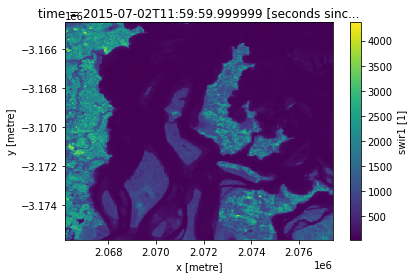

In [6]:
ds.swir1.isel(time=0).plot()

#### Exercise: Can you create a plot for the red channel in 2018?

#### It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets. To plot multiple images, skip the `isel()` step above and plot the entire `xarray.DataArray` directly. 

#### To plot multiple timesteps in one figure, it is necessary to instruct the `.plot()` function to put each timestep in a different column. This is done by specifying `.plot(col="time")`:

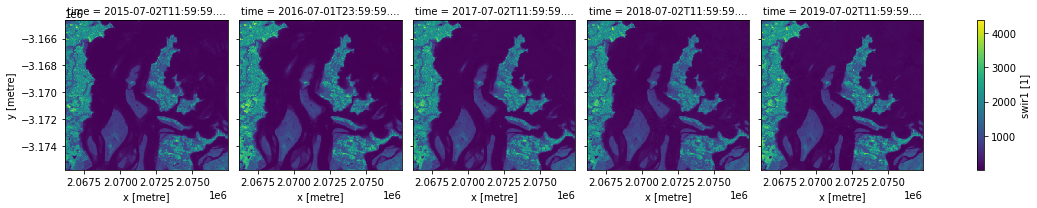

In [7]:
ds.swir1.plot(col="time")

>Note: This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

#### The plots above are dark and difficult to see details in them. To improve the appearance of `xarray` plots, use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. This will use the 2nd and 98th percentiles of the data to compute the color limits:

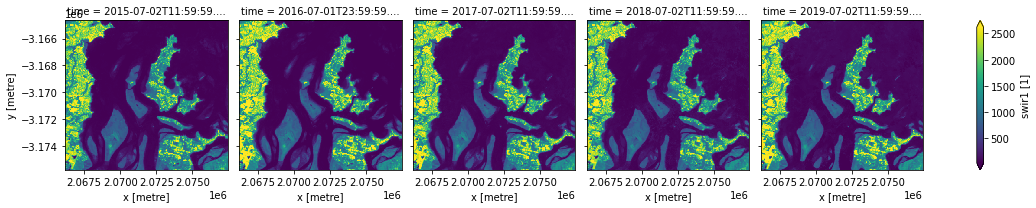

In [8]:
ds.swir1.plot(col="time", robust=True)

#### Plots can be further customised by adding custom colour maps/styles using the `cmap` parameter. When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

#### It is also important to consider colour blindness when selecting a colour map. `XArray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness. You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

#### For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). The example cell below plots the data with the perceptually uniform `magma` colour map:

In [ ]:
ds.swir1.plot(col="time", robust=True, cmap="magma")

#### Exercise: Experiment with the previous colour maps and create different displays with the contents of the dataset.

#### Although `XArray` makes it easy to plot single band images, plotting a three band RGB colour image is less straightforward. If you recall the not easy to remember chain of methods that we have been using previously:

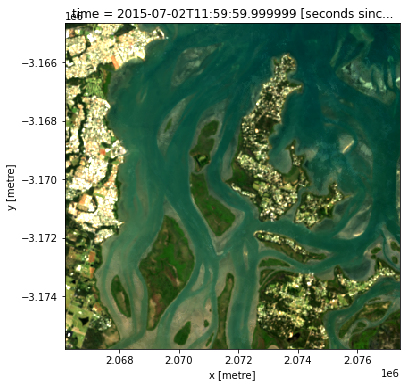

In [9]:
ds[['red', 'green', 'blue']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(6,6))

#### To make the previous process easier, the [dea-notebooks repository](https://github.com/GeoscienceAustralia/dea-notebooks) provides a custom `rgb()` function that is designed for plotting three band images. The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

#### The `rgb()` It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

#### For example for plotting a single timestep:

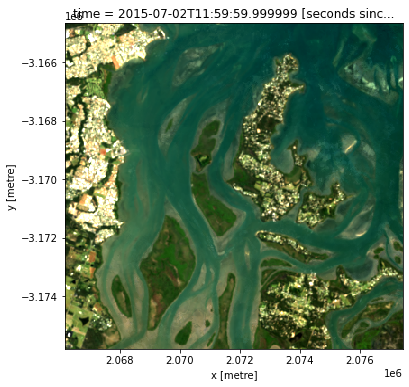

In [10]:
# View a red, green, blue (true colour) image of the first timestep
rgb(ds, bands=["red", "green", "blue"], index=0)

#### Exercise: Can you create a false colour image, with the following mapping (`swir1`, `nir`, `green`)?

In [ ]:
answ = [?,?,?]

rgb(ds, bands=answ, index=0)

check_answer("DEA4.4", answ)

#### The `rgb()` function can also do display multiple timesteps, as long as a list of timesteps to view is provided to the `index` argument, e.g. `index=[X1, X2, ...]`. The example cell below plots the first and fifth image in the dataset using `index=[0, 4]` (remembering that counting in Python starts at 0):

In [ ]:
rgb(ds, bands=['red', 'green', 'blue'], index=[0, 3])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax demonstrated in the [single band example above](#Plotting-multiple-timesteps): 

In [ ]:
rgb(ds, bands=['red', 'green', 'blue'], col="time")

#### By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels, using the 2nd and 98th percentiles of the data to compute the colour limits

#### If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. This clips the most extreme minimum and maximum values in the dataset, improving the contrast and appearance of the plot. For example, specifying `percentile_stretch=[0.05, 0.95]` will clip out the darkest and brightest 5% of pixels, focusing the colour stretch on the remaining 90% of less extreme values:

In [ ]:
rgb(ds, 
    bands=['red', 'green', 'blue'], 
    index=0, 
    percentile_stretch=[0.05, 0.95])

#### Exercise: Can you create an NDVI composite from the previous dataset and use the `.plot()` using the `summer_r` cmap and passing `'time'` to the col parameter?

In [ ]:
ndvi = ?

ndvi.plot(?, ?)